<a href="https://colab.research.google.com/github/ds007kumar/IMAGE-PROCESSING/blob/master/Copy_of_MNIST_CNN_Colab_20200214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MNIST Classification using CNNs</h1>

---



# Importing Keras Modules


In [1]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Installing Tensorboard for Colab
!pip install tensorboardcolab

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Loading the Dataset

<h3>Download train and test sets of  MNIST dataset</h3>

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<h4>Visualizing the dataset</h4>

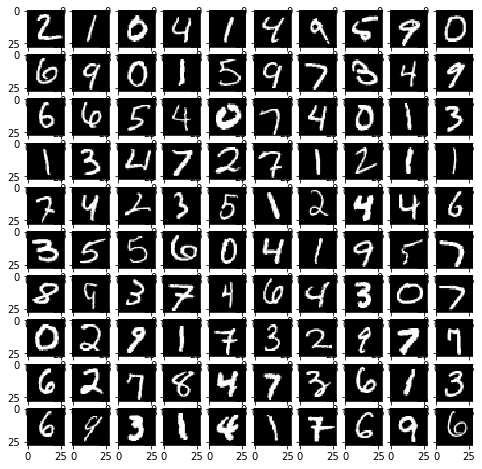

In [5]:
%matplotlib inline

# As we test first 100 test examples, So as you know this subplot essentialy takes the number of rows and number of columns
#...counter...so counter goes to 1...100, 
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [6]:
y_test[0:100]

# now lets print first test 100 test lables ..1st label is 7 and second label 2 100 ....we now know our data check out and 

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

<h3>Reshape train and test sets into shapes compatible with keras models</h3>

<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [9]:
# we want to reshape our data such that Keras Likes it.
# lets print the shape of our data how does it look like.

x_train.shape

(60000, 28, 28, 1)

Keras we also need to give qa number of channel though it is 1 but it need on extra dimension we reshaping the training and test set, 60000,28,28,1 and in test datasets 10000,28,28,1

Chaneel =2.... we add one more dimesinon height -H width -=w 


In [11]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_train.max()

255

In [0]:
# input image dimensions....
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>


Some Minmal Preporcessing 
First we want to convert our training and test sets in to float


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [15]:
# Now we again check x-train.max

x_train.max()

255

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [16]:
print(y_train[0])

5


In [17]:
y_train.shape

(60000,)

The Shape is Now 60000, 1D so we do the hot encoding

<h4>Convert Labels from digits to one hot vectors</h4>

We convert Digits to one hot encoder as you know 

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now after Doing hot encoding Shape in 2D ....(60,000,10)
Now it becomes ONE HOT VECTOR


In [22]:
y_train.shape

(60000, 10)

In [23]:
print(y_train[0])

### It has become ONE HOT  Vector .

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

<h4>Define the layers of model</h4>

In [24]:
#Initialize the model: Model is a container so in COntainer we our fisrt convolution module with 32 Filter of size 3*3 and activation relu
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
import os
#### Add your code here ####
os.getcwd()
os.chdir("/content/drive/My Drive/CVV/")
os.getcwd()

'/content/drive/My Drive/CVV'

In [35]:
import skimage.io as io # Image Input Output from Skimage
import matplotlib.pyplot as plt # For Plotting Function
import numpy as np # Numpy Array
# Read the image CONVOULUTION LAYERS ILLUSTRATION
img = io.imread('CONVO_ILLUST.jpg')
from PIL import Image # importing image module 

# open image using open function if image and python not in same directory then take care of path of image
img = Image.open('CONVO_ILLUST.jpg') 

print(img.format) # display image format like jpeg,png etc
print(img.mode) # display image mode like RGB etc.
print(img.size) # display image size width and height

img.show() #showing image 

JPEG
RGB
(1920, 1080)


<h4>Setting Optimizer and Loss function for training</h4>

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Training the CNN 

<h4>Initializing the Tensorboard callback for visualization of training</h4>

In [0]:
#Import tensorboardcolab modules for creating a tensorboard call back which will passed in model.fit function.
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

#Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
tbc = TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://94692489.ngrok.io


<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

<h4>Fit the model to the dataset</h4>

In [0]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[TensorBoardColabCallback(tbc),early_stopping,model_checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.2346 - acc: 0.9290 - val_loss: 0.0452 - val_acc: 0.9853

Epoch 00001: val_loss improved from inf to 0.04516, saving model to mnist_cnn_checkpoint_01_loss0.0452.h5
Epoch 2/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0845 - acc: 0.9747 - val_loss: 0.0387 - val_acc: 0.9864

Epoch 00002: val_loss improved from 0.04516 to 0.03871, saving model to mnist_cnn_checkpoint_02_loss0.0387.h5
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0626 - acc: 0.9813 - val_loss: 0.0345 - val_acc: 0.9878

Epoch 00003: val_loss improved from 0.03871 to 0.03452, saving model to mnist_cnn_checkpoint_03_loss0.0345.h5
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0504 - acc: 0.9847 - val_loss: 0.0280 - val_acc: 0.9903

Epoch 00004: val_loss improved from 0.03452 to 0.02800, saving mode

# Evaluating the CNN

<h4>Evaluate trained model on the test set</h4>

In [0]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 108us/step
('Test loss:', 0.023927093083013096)
('Test accuracy:', 0.9929)


<h4>Visualizing some predictions</h4>

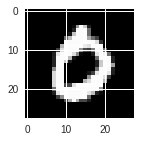

0


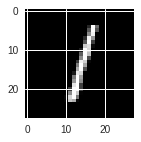

1


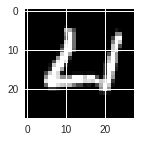

4


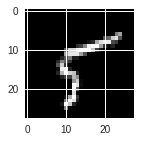

5


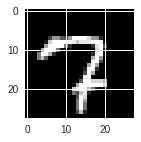

7


In [0]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))

# Saving the CNN

<h4>Save the trained weights and model in h5 files</h4>

In [0]:
#Set the path where you want to store the model and weights. 
model.save('./cnn_mnist.h5')
model.save_weights('./cnn_mnist_weights.h5')